# MOVIE RATING PREDICTION 

## Import the necessary Libraries

In [93]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
colors = ['#235E72']

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [94]:
movies_df = pd.read_csv('C:/Users/Deepak/OneDrive/Desktop/CODSOFT/Task-02/Movies.csv', encoding='latin1')

movies_df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [95]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [96]:
# Check the shape of the dataset
print(movies_df.shape)


(15509, 10)


Data Preprocessing


In [97]:
movies_df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [98]:
# Locating rows with missing values in columns from 1 to 9

nulls = movies_df[movies_df.iloc[:, 1:9].isna().all(axis=1)]
nulls.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1836,Bang Bang Reloaded,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,Battle of bittora,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2653,Campus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3403,Dancing Dad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3807,Dial 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
# Checking for the uniques years.
movies_df['Year'].unique()

array([nan, '(2019)', '(2021)', '(2010)', '(1997)', '(2005)', '(2008)',
       '(2012)', '(2014)', '(2004)', '(2016)', '(1991)', '(1990)',
       '(2018)', '(1987)', '(1948)', '(1958)', '(2017)', '(2020)',
       '(2009)', '(2002)', '(1993)', '(1946)', '(1994)', '(2007)',
       '(2013)', '(2003)', '(1998)', '(1979)', '(1951)', '(1956)',
       '(1974)', '(2015)', '(2006)', '(1981)', '(1985)', '(2011)',
       '(2001)', '(1967)', '(1988)', '(1995)', '(1959)', '(1996)',
       '(1970)', '(1976)', '(2000)', '(1999)', '(1973)', '(1968)',
       '(1943)', '(1953)', '(1986)', '(1983)', '(1989)', '(1982)',
       '(1977)', '(1957)', '(1950)', '(1992)', '(1969)', '(1975)',
       '(1947)', '(1972)', '(1971)', '(1935)', '(1978)', '(1960)',
       '(1944)', '(1963)', '(1940)', '(1984)', '(1934)', '(1955)',
       '(1936)', '(1980)', '(1966)', '(1949)', '(1962)', '(1964)',
       '(1952)', '(1933)', '(1942)', '(1939)', '(1954)', '(1945)',
       '(1961)', '(1965)', '(1938)', '(1941)', '(1931)', 

In [100]:
# Handling the null values
movies_df.dropna(subset=['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)

#Extracting only the text part from the Name column
movies_df['Name'] = movies_df['Name'].str.extract('([A-Za-z\s\'\-]+)')

# Replacing the brackets from year column as observed above
movies_df['Year'] = movies_df['Year'].str.replace(r'[()]', '', regex=True).astype(int)

# Convert 'Duration' to numeric and replacing the min, while keeping only numerical part
movies_df['Duration'] = pd.to_numeric(movies_df['Duration'].str.replace(r' min', '', regex=True), errors='coerce')

# Splitting the genre by , to keep only unique genres and replacing the null values with mode
movies_df['Genre'] = movies_df['Genre'].str.split(', ')
movies_df = movies_df.explode('Genre')
movies_df['Genre'].fillna(movies_df['Genre'].mode()[0], inplace=True)

# Convert 'Votes' to numeric and replace the , to keep only numerical part
movies_df['Votes'] = pd.to_numeric(movies_df['Votes'].str.replace(',', ''), errors='coerce')

In [101]:
#checking duplicate values by Name and Year

duplicate = movies_df.groupby(['Name', 'Year']).filter(lambda x: len(x) > 1)
duplicate.head(7)

# Dropping the duplicated values by Name
movies_df = movies_df.drop_duplicates(subset='Name', keep=False)

## Exploratory Data Analysis

In [102]:
movies_df.describe(include = 'O')

,Name,Genre,Director,Actor 1,Actor 2,Actor 3
count,1528,1528,1528,1528,1528,1528
unique,1528,20,1114,1010,1131,1154
top,Gadhvi,Drama,Kanti Shah,Mithun Chakraborty,Mithun Chakraborty,Pran
freq,1,789,13,22,12,16


In [103]:
# Find the row with the highest and lowest number of votes for a movie.
max_votes_row = movies_df[movies_df['Votes'] == movies_df['Votes'].max()]
min_votes_row = movies_df[movies_df['Votes'] == movies_df['Votes'].min()]

print("The movie with Highest Votes is",max_votes_row['Name'].values[0],"with", max_votes_row["Votes"].values[0],"released in the year ", max_votes_row["Year"].values[0])
print('\n')
print("The movie with the Lowest Votes is", min_votes_row['Name'].values[0], "with", min_votes_row["Votes"].values[0],"released in the year ", min_votes_row["Year"].values[0])




The movie with Highest Votes is My Name Is Khan with 101014 released in the year  2010


The movie with the Lowest Votes is Anmol Sitaare with 5 released in the year  1982


In [104]:
# Find the row with the highest and lowest number of Ratings for a movie.
max_Rating_row = movies_df[movies_df['Rating'] == movies_df['Rating'].max()]
min_Rating_row = movies_df[movies_df['Rating'] == movies_df['Rating'].min()]

print("The movie with Highest Rating is",max_Rating_row['Name'].values[0],"with", max_Rating_row["Rating"].values[0])
print('\n')
print("The movie with the Lowest Rating is", min_Rating_row['Name'].values[0], "with", min_Rating_row["Rating"].values[0])

The movie with Highest Rating is June with 9.4


The movie with the Lowest Rating is Mumbai Can Dance Saalaa with 1.6


In [105]:
# Top Five Directors with Highest Rated Movies

# Group the DataFrame by director and calculate the average rating
director_average_ratings = movies_df.groupby('Director')['Rating'].mean().reset_index()

# Sort the director_average_ratings DataFrame by average rating in descending order
director_average_ratings_sorted = director_average_ratings.sort_values(by='Rating', ascending=False)

# Print the sorted director_average_ratings DataFrame
print(director_average_ratings_sorted.head())


            Director  Rating
120    Arvind Pratap     9.4
989   Suhrud Godbole     9.4
613     Nikhil Mahar     9.3
1103    Vishwa Bhanu     9.3
707    Rahul Mallick     9.3


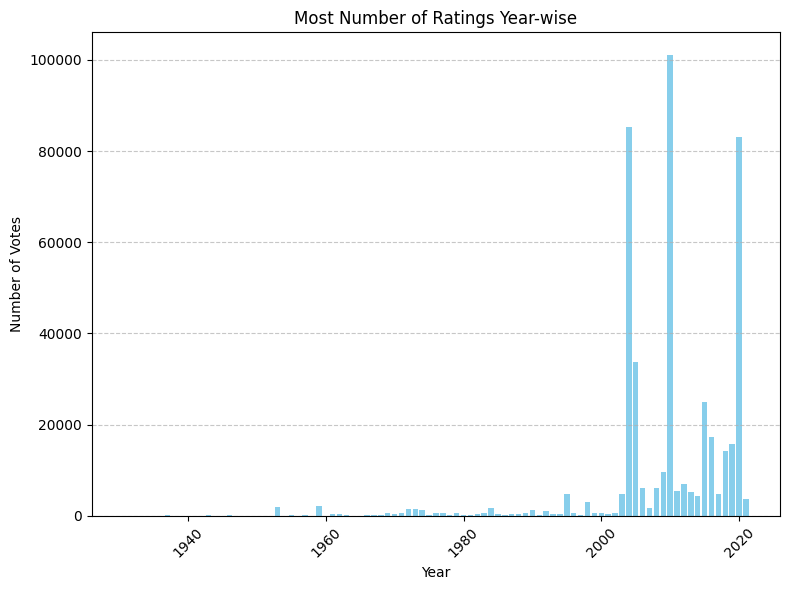

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'movies_df' containing the movie data

# Group the DataFrame by 'Year' and find the movie with the most number of ratings for each year
most_ratings_yearwise = movies_df.loc[movies_df.groupby('Year')['Votes'].idxmax()]

# Plot the year-wise distribution
plt.figure(figsize=(8, 6))
plt.bar(most_ratings_yearwise['Year'], most_ratings_yearwise['Votes'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Votes')
plt.title('Most Number of Ratings Year-wise')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<Figure size 2000x5000 with 0 Axes>

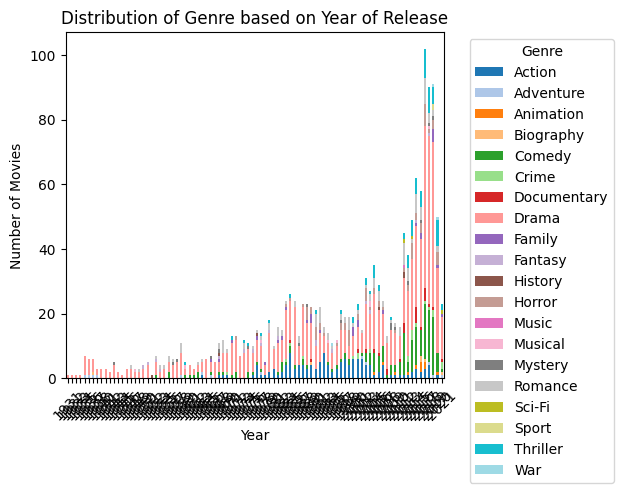

In [107]:
# Group the DataFrame by 'Year' and 'Genre', and count the occurrences of each genre for each year
genre_counts_yearwise = movies_df.groupby(['Year', 'Genre']).size().unstack(fill_value=0)

# Plot the stacked bar plot
plt.figure(figsize=(20, 50))
genre_counts_yearwise.plot(kind='bar', stacked=True, cmap='tab20')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Distribution of Genre based on Year of Release')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

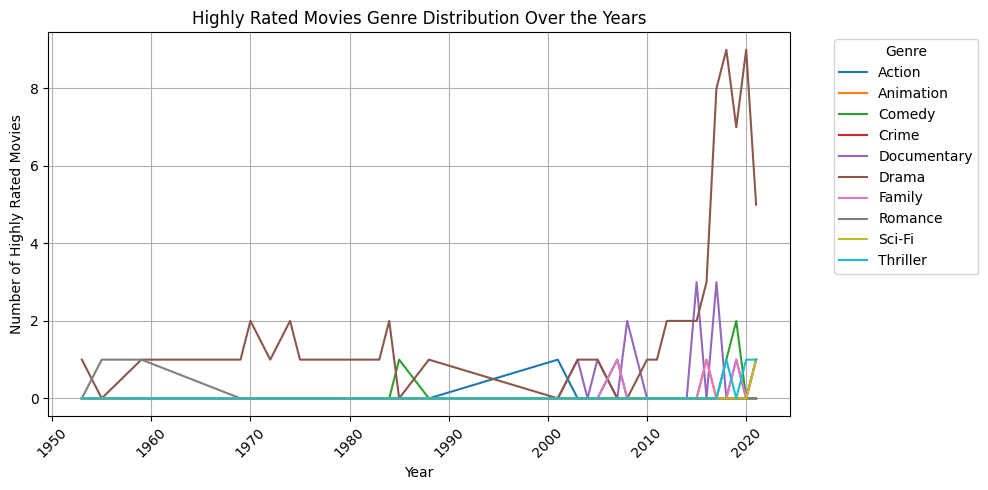

In [108]:
# Define the threshold for highly rated movies
threshold_rating = 8.0

# Filter the DataFrame to include only highly rated movies
highly_rated_movies = movies_df[movies_df['Rating'] >= threshold_rating]

# Group the filtered DataFrame by 'Year' and 'Genre', and count the occurrences of each genre for each year
genre_counts_yearwise = highly_rated_movies.groupby(['Year', 'Genre']).size().unstack(fill_value=0)

# Plot the line graph
plt.figure(figsize=(10, 5))
for genre in genre_counts_yearwise.columns:
    plt.plot(genre_counts_yearwise.index, genre_counts_yearwise[genre], label=genre)

plt.xlabel('Year')
plt.ylabel('Number of Highly Rated Movies')
plt.title('Highly Rated Movies Genre Distribution Over the Years')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

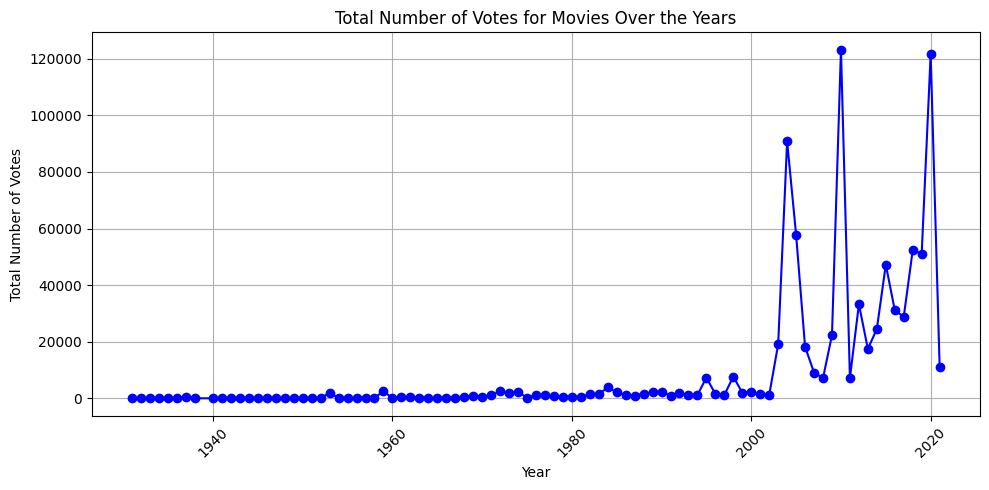

In [109]:
votes_yearwise = movies_df.groupby('Year')['Votes'].sum()

# Plot the line graph
plt.figure(figsize=(10, 5))
plt.plot(votes_yearwise.index, votes_yearwise.values, marker='o', color='b', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Number of Votes')
plt.title('Total Number of Votes for Movies Over the Years')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [110]:
# Sort the DataFrame by rating in descending order and then by duration in descending order
highest_rated_longest_movies = movies_df.sort_values(by=['Rating', 'Duration'], ascending=[False, False])

# Print the top 10 highest-rated movies in terms of duration
print(highest_rated_longest_movies[['Name', 'Rating', 'Duration']].head(10))

                        Name  Rating  Duration
14222    The Reluctant Crime     9.4       113
6852                    June     9.4        93
1314            Ashok Vatika     9.3        97
5125             God of gods     9.3        90
1729                Baikunth     9.3        72
11843                   Refl     9.3        65
6025             I'm in Love     9.2       140
14071          The Flip Side     9.2        48
13384        Soorarai Pottru     9.1       153
10210  Nirmal Anand Ki Puppy     9.1       100


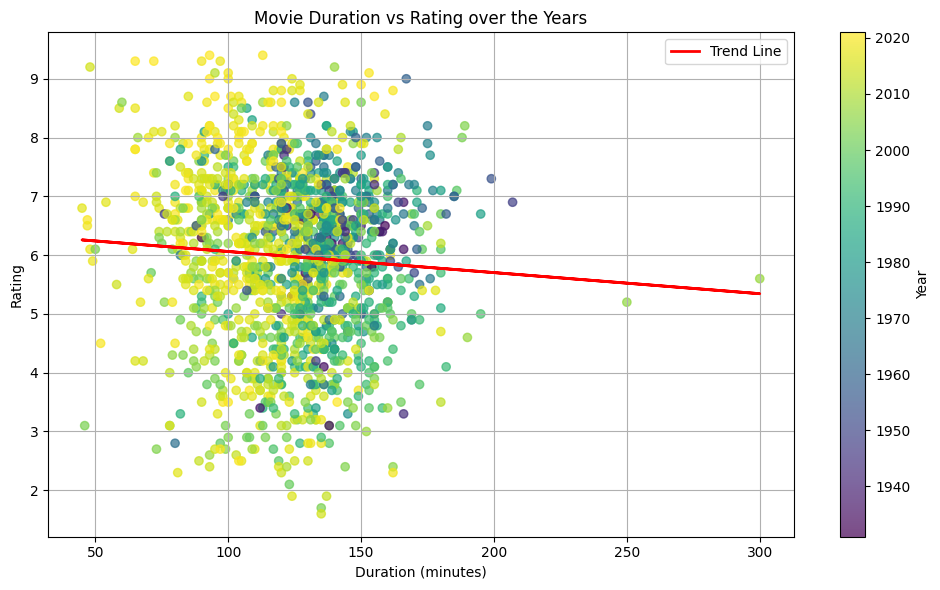

In [111]:

# Fit a linear regression model
model = LinearRegression()
X = movies_df[['Duration']]
y = movies_df['Rating']
model.fit(X, y)

# Predict ratings using the linear regression model
y_pred = model.predict(X)

# Plot the scatter plot with the trend line
plt.figure(figsize=(10, 6))
plt.scatter(movies_df['Duration'], movies_df['Rating'], c=movies_df['Year'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Year')
plt.plot(X, y_pred, color='red', linewidth=2, label='Trend Line')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.title('Movie Duration vs Rating over the Years')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The trend line will provide you with an indication of the overall direction of the relationship between movie duration and rating over the years. If the trend line slopes upwards, it suggests that there's a positive correlation between movie duration and rating. If it slopes downwards, it suggests a negative correlation. Adjust column names as needed based on the actual column names in your DataFrame.






## Building the Model

In [112]:
# Dropping non essential columns
movies_df.drop('Name', axis = 1, inplace = True)

In [113]:
# Grouping the columns with their average rating and then creating a new feature

genre_mean_rating = movies_df.groupby('Genre')['Rating'].transform('mean')
movies_df['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = movies_df.groupby('Director')['Rating'].transform('mean')
movies_df['Director_encoded'] = director_mean_rating

actor1_mean_rating = movies_df.groupby('Actor 1')['Rating'].transform('mean')
movies_df['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = movies_df.groupby('Actor 2')['Rating'].transform('mean')
movies_df['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = movies_df.groupby('Actor 3')['Rating'].transform('mean')
movies_df['Actor3_encoded'] = actor3_mean_rating

In [114]:
# Keeping the predictor and target variable

X = movies_df[[ 'Year', 'Votes', 'Duration', 'Genre_mean_rating','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = movies_df['Rating']

In [115]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [116]:
# Building Linear Regression Model

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

In [117]:
print('The performance evaluation of Linear Regression is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, lr_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, lr_pred))
print('R2 score: ',r2_score(y_test, lr_pred))

The performance evaluation of Linear Regression is below:  

Mean squared error:  0.13007622782536266
Mean absolute error:  0.2507994097724829
R2 score:  0.935188545523222


In [118]:
X.head()

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,8,109,6.420152,7.000,6.850000,7.000000,7.000
10,2004,17,96,6.420152,6.200,5.766667,5.100000,6.200
11,2016,59,120,4.698529,5.900,5.900000,5.900000,5.900
30,2005,1002,116,6.420152,6.525,6.900000,6.866667,5.700
32,1993,15,168,6.420152,5.400,5.600000,6.400000,5.825


In [119]:
y.head()

1     7.0
10    6.2
11    5.9
30    7.1
32    5.6
Name: Rating, dtype: float64

In [120]:
# Creating a new dataframe with values close to the 5th row according to the sample above 

data = {'Year': [1993], 'Votes': [13], 'Duration': [160], 'Genre_mean_rating': [4.5], 'Director_encoded': [5.0], 'Actor1_encoded': [5.9], 'Actor2_encoded': [6.5], 'Actor3_encoded': [5.900]}
df = pd.DataFrame(data)

In [121]:
# Predict the movie rating
predicted_rating = lr.predict(df)

# Display the predicted rating
print("Predicted Rating:", predicted_rating[0])

Predicted Rating: 5.676370709004251


By using Linear Regression model the model had made near accurate prediction for the given input